In [1]:
import argparse
import logging
import sys
import time

from tf_pose import common
import cv2
import numpy as np
import matplotlib
matplotlib.use('TKAgg')
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

logger = logging.getLogger('TfPoseEstimator')
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('[%(asctime)s] [%(name)s] [%(levelname)s] %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)


#if __name__ == '__main__':
 #   parser = argparse.ArgumentParser(description='tf-pose-estimation run')
  #  parser.add_argument('--image', type=str, default='./images/p1.jpg')
   # parser.add_argument('--model', type=str, default='cmu', help='cmu / mobilenet_thin')

   # parser.add_argument('--resize', type=str, default='0x0',
                        #help='if provided, resize images before they are processed. default=0x0, Recommends : 432x368 or 656x368 or 1312x736 ')
    #parser.add_argument('--resize-out-ratio', type=float, default=4.0,
                       # help='if provided, resize heatmaps before they are post-processed. default=1.0')

    #args = parser.parse_args()
    
image_path='./images/kb.jpg'
    
model_path='mobilenet_thin'
    
#w = 432
#h = 368
w=1000
h=600
resize_out_ratio = 4.0
e = TfPoseEstimator(get_graph_path(model_path), target_size=(w, h))

    # estimate human poses from a single image !
image = common.read_imgfile(image_path, None, None)
if image is None:
    logger.error('Image can not be read, path=%s' % image_path)
    sys.exit(-1)
t = time.time()
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=resize_out_ratio)
elapsed = time.time() - t

logger.info('inference image: %s in %.4f seconds.' % (image_path, elapsed))

image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)

/Users/david/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
[2018-07-08 19:35:23,789] [TfPoseEstimator] [INFO] loading graph from /Users/david/Desktop/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=1000x600)
[2018-07-08 19:35:23,789] [TfPoseEstimator] [INFO] loading graph from /Users/david/Desktop/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=1000x600)
[2018-07-08 19:35:37,756] [TfPoseEstimator] [DEBUG] inference+ original shape=2000x1331
[2018-07-08 19:35:37,756] [TfPoseEstimator] [DEBUG] inference+ original shape=2000x1331
[2018-07-08 19:35:40,786] [TfPoseEstimator] [DEBUG] inference- heatMat=500x300 pafMat=500x300
[2018-07-08 19:35:40,786] [TfPoseEstimator] [DEBUG] inference- heatMat=500x300 p

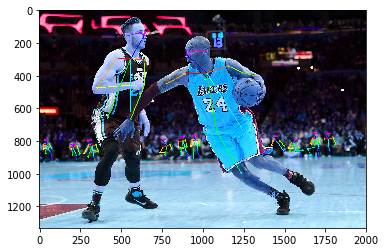

In [2]:
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

plt.imshow(image)

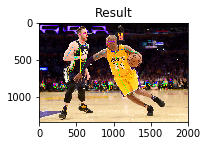

In [3]:
fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
a.set_title('Result')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

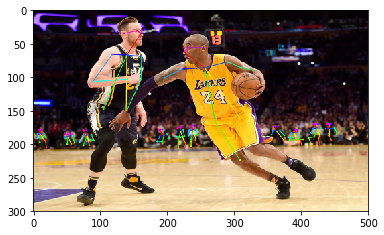

In [4]:
bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
bgimg = cv2.resize(bgimg, (e.heatMat.shape[1], e.heatMat.shape[0]), interpolation=cv2.INTER_AREA)
#matplotlib.image.imsave('./images/resulttt.png', bgimg)
matplotlib.image.imsave('./images/resulttt.png', bgimg)
plt.imshow(bgimg)
plt.show()
    # show network output


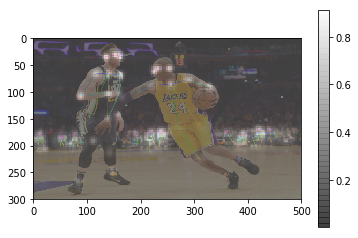

In [5]:
a = fig.add_subplot(2, 2, 2)
plt.imshow(bgimg, alpha=0.5)
tmp = np.amax(e.heatMat[:, :, :-1], axis=2)
plt.imshow(tmp, cmap=plt.cm.gray, alpha=0.5)
plt.colorbar()
plt.show()


In [7]:
import matplotlib.rcsetup as rcsetup
print(rcsetup.all_backends)

['GTK', 'GTKAgg', 'GTKCairo', 'GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'gdk', 'pdf', 'pgf', 'ps', 'svg', 'template']
